In [2]:
import os
import h5py
import numpy as np
import imgaug as ia
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

from config import anpr_config as config
from pyimagesearch.io import HDF5DatasetGenerator
from pyimagesearch.nn.conv import OCR
from pyimagesearch.preprocessing import AspectAwarePreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor

ia.seed(1)

os.chdir(os.path.join("D:/development/cv/ANPR-keras"))

Using TensorFlow backend.


original image: (100, 473)


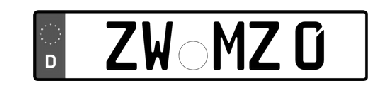

simple preprossor image: (32, 160)


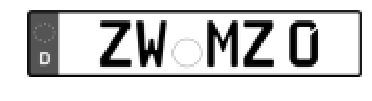

aspect aware preprossor image: (32, 160)


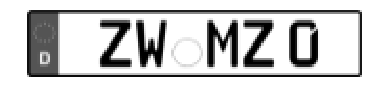

In [3]:
trainData = h5py.File(config.TRAIN_HDF5)
images = np.array(trainData["images"])
images = images.astype("float") / 255.0
np.random.shuffle(images)
original_image = images[0]
trainData.close()

print("original image: %s" % str(original_image.shape))

plt.axis("off")
plt.imshow(original_image, cmap='gray')
plt.show()

sp = SimplePreprocessor(config.IMAGE_WIDTH, config.IMAGE_HEIGHT)
sp_image = sp.preprocess(original_image)
print("simple preprossor image: %s" % str(sp_image.shape))

plt.axis("off")
plt.imshow(sp_image, cmap='gray')
plt.show()

aap = AspectAwarePreprocessor(config.IMAGE_WIDTH, config.IMAGE_HEIGHT)
aap_image = aap.preprocess(original_image)
print("aspect aware preprossor image: %s" % str(aap_image.shape))

plt.axis("off")
plt.imshow(aap_image, cmap='gray')
plt.show()


In [6]:
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15,
                         width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

sp = SimplePreprocessor(config.IMAGE_WIDTH, config.IMAGE_HEIGHT)
aap = AspectAwarePreprocessor(config.IMAGE_WIDTH, config.IMAGE_HEIGHT)
trainGen = HDF5DatasetGenerator(config.TRAIN_HDF5, config.BATCH_SIZE, preprocessors=[sp], aug=aug)

inputs, outputs = trainGen.generator().__next__()
images = np.array(inputs["data"])
trainGen.close()

cols = 6
rows = len(images) // cols

print(images.shape)

image_index = 0
f, axarr = plt.subplots(rows, cols, figsize=(20, 15))
for r in range(rows):
    for c in range(cols):
        image = images[image_index].reshape(32, 160)
        axarr[r, c].axis("off")
        axarr[r, c].imshow(image, cmap='Greys_r')
        #axarr[r, c].imshow(image, cmap='gray')
        image_index += 1

plt.show()



(128, 160, 32, 1)
